# CAPSTONE PROJECT
## Phase 2: Data Understanding & Preparation
### Data Ingestion & Wrangling
SALIFOU SYLLA

OCTOBER 7, 2020

# Crash Reporting from dataMontgomery

The dataset used is Crash Reporting Data set. Those datasets are about car crashes that have occurred in the Montgomery County, they provide information about the driver, the incident, and the non-motorist. They are from https://www.montgomerycountymd.gov/. The dataMontgomery program seeks to provide residents and constituents with direct access to County datasets in consumable formats, so they may be viewed, sorted and used in various ways, including being potentially leveraged in the development of new applications and services by interested parties. Providing this information offers the public an opportunity to review and analyze raw data, and the opportunity to use it for a variety of purposes. The following are those three datasets:
1.	Crash Reporting - Incidents Data:
https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Incidents-Data/bhju-22kf
2.	Crash Reporting - Drivers Data 
https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Drivers-Data/mmzv-x632
3.	Crash Reporting - Non-Motorists Data 
https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Non-Motorists-Data/n7fkdce5


## Importing Libraries

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
#from pyproj import Proj, transform
from datetime import datetime
from datetime import date, time
import matplotlib.pyplot as plt
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


## Loading web data file to pandas dataframe
Since dataMontgomery updates its datasets frequently, then we are
reading data from the dataMontgomery url each time in the code. 

### Loading the first dataset (Incidents Data)

In [227]:
url = "https://data.montgomerycountymd.gov/api/views/bhju-22kf/rows.csv?accessType=DOWNLOAD"
incidentsData = pd.read_csv(url)
#incidentsData.info()

In [228]:
# remove spaces in columns name
incidentsData.columns = incidentsData.columns.str.replace(' ','_').str.lower().str.replace('/','_').str.replace('-','_')
incidentsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66494 entries, 0 to 66493
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   report_number                 66494 non-null  object 
 1   local_case_number             66494 non-null  object 
 2   agency_name                   66494 non-null  object 
 3   acrs_report_type              66494 non-null  object 
 4   crash_date_time               66494 non-null  object 
 5   hit_run                       66492 non-null  object 
 6   route_type                    57657 non-null  object 
 7   mile_point                    58026 non-null  float64
 8   mile_point_direction          57671 non-null  object 
 9   lane_direction                58037 non-null  object 
 10  lane_number                   66494 non-null  int64  
 11  lane_type                     6430 non-null   object 
 12  number_of_lanes               66494 non-null  int64  
 13  d

In [229]:
incidentsData.shape

(66494, 44)

In [264]:
incidentsData.isnull().sum()

report_number                       0
local_case_number                   0
agency_name                         0
acrs_report_type                    0
crash_date_time                     0
hit_run                             2
route_type                       8837
mile_point                       8468
mile_point_direction             8823
lane_direction                   8457
lane_number                         0
lane_type                       60064
number_of_lanes                     0
direction                        8468
distance                         6602
distance_unit                    8458
road_grade                       8922
nontraffic                          0
road_name                        8458
cross_street_type                8848
cross_street_name                8462
off_road_description            58037
municipality                    59467
related_non_motorist            62836
at_fault                            0
collision_type                    343
weather     

### Loading the second dataset (Drivers Data)

In [265]:
url = "https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD"
driversData = pd.read_csv(url)
#driversData.info()

In [266]:
# remove spaces in columns name
driversData.columns = driversData.columns.str.replace(' ','_').str.lower().str.replace('/','_').str.replace('-','_')
driversData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118036 entries, 0 to 118035
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   report_number                   118036 non-null  object 
 1   local_case_number               118036 non-null  object 
 2   agency_name                     118036 non-null  object 
 3   acrs_report_type                118036 non-null  object 
 4   crash_date_time                 118036 non-null  object 
 5   route_type                      106605 non-null  object 
 6   road_name                       107187 non-null  object 
 7   cross_street_type               106591 non-null  object 
 8   cross_street_name               107183 non-null  object 
 9   off_road_description            10848 non-null   object 
 10  municipality                    12870 non-null   object 
 11  related_non_motorist            3698 non-null    object 
 12  collision_type  

In [267]:
driversData.shape

(118036, 43)

In [272]:
driversData.isnull().sum()

report_number                          0
local_case_number                      0
agency_name                            0
acrs_report_type                       0
crash_date_time                        0
route_type                         11431
road_name                          10849
cross_street_type                  11445
cross_street_name                  10853
off_road_description              107188
municipality                      105166
related_non_motorist              114338
collision_type                       399
weather                             9304
surface_condition                  13939
light                                968
traffic_control                    18682
driver_substance_abuse             21561
non_motorist_substance_abuse      115102
person_id                              0
driver_at_fault                        0
injury_severity                        0
circumstance                       95248
driver_distracted_by                   0
drivers_license_

### Loading the third dataset (Non-Motorists Data)

In [273]:
url = "https://data.montgomerycountymd.gov/api/views/n7fk-dce5/rows.csv?accessType=DOWNLOAD"
nonMotoristsData = pd.read_csv(url)
#nonMotoristsData.info()

In [274]:
# remove spaces in columns name
nonMotoristsData.columns = nonMotoristsData.columns.str.replace(' ','_').str.lower().str.replace('/','_').str.replace('-','_')
nonMotoristsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3839 entries, 0 to 3838
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   report_number                     3839 non-null   object 
 1   local_case_number                 3839 non-null   int64  
 2   agency_name                       3839 non-null   object 
 3   acrs_report_type                  3839 non-null   object 
 4   crash_date_time                   3839 non-null   object 
 5   route_type                        2934 non-null   object 
 6   road_name                         2981 non-null   object 
 7   cross_street_type                 2934 non-null   object 
 8   cross_street_name                 2980 non-null   object 
 9   off_road_description              858 non-null    object 
 10  municipality                      420 non-null    object 
 11  related_non_motorist              3839 non-null   object 
 12  collis

In [275]:
nonMotoristsData.shape

(3839, 32)

In [276]:
nonMotoristsData.isnull().sum()

report_number                          0
local_case_number                      0
agency_name                            0
acrs_report_type                       0
crash_date_time                        0
route_type                           905
road_name                            858
cross_street_type                    905
cross_street_name                    859
off_road_description                2981
municipality                        3419
related_non_motorist                   0
collision_type                       125
weather                              346
surface_condition                    970
light                                 31
traffic_control                      595
driver_substance_abuse               710
non_motorist_substance_abuse         802
person_id                              0
pedestrian_type                        0
pedestrian_movement                  106
pedestrian_actions                   207
pedestrian_location                  110
pedestrian_obeye

# Exploratory Data Analysis

Dataset containts different informations about the accients ocurred in the Montgomery County from 2015 to 2020. The main goal is to extract some insights that can be useful to reduce the number of accidents in the County.

## Combining DataFrames with Pandas
pandas.concat() function concatenates the two DataFrames and returns a new dataframe with the new columns as well. The dataframe row that has no value for the column will be filled with NaN


In [236]:
# First concatenate incidents Data with drivers Data
concat1 = pd.concat([incidentsData, driversData])

# Then concatenate the result of the first concat with Non-Motorists Data
df = pd.concat([concat1, nonMotoristsData])

## Describe the dataset

In [237]:
#The shape attribute tells us a number of observations and variables we have in the data set.
df.shape

(188369, 72)

In [238]:
#info() is used to check the Information about the data and the datatypes of each respective attribute.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188369 entries, 0 to 3838
Data columns (total 72 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   report_number                     188369 non-null  object 
 1   local_case_number                 188369 non-null  object 
 2   agency_name                       188369 non-null  object 
 3   acrs_report_type                  188369 non-null  object 
 4   crash_date_time                   188369 non-null  object 
 5   hit_run                           66492 non-null   object 
 6   route_type                        167196 non-null  object 
 7   mile_point                        58026 non-null   float64
 8   mile_point_direction              57671 non-null   object 
 9   lane_direction                    58037 non-null   object 
 10  lane_number                       66494 non-null   float64
 11  lane_type                         6430 non-null    obj

### The main features of the dataset are:

**report_number:** ACRS Report Number assigned to the incident.                 
local_case_number: Case number from the local investigating agency for the incident.<br>
agency_name: Name of the investigating agency.<br>
**acrs_report_type:** Identifies crash as property, injury, or fatal.<br>
**crash_date_time:** Date and Time of crash.<br>
**hit_run:** Unit-Vehicle left the scene resulting in a hit and run event.<br>
**route_type:** Type of roadway at crash location.<br>
mile_point: Location - Mile point.<br>
mile_point_direction: Location - Mile point direction.<br>
lane_direction: Road/Area - Lane direction of travel.<br>
lane_number: Road/Area - Lane number of where the event occurred on.<br>
**lane_type:** Road/Area - Type of roadway/area lane.<br>
**number_of_lanes:** Road/Area - Number of lanes.<br>
**direction:** Location - Direction from mile point.<br>
**distance:** Location - Distance from mile point.<br>
distance_unit: Location - Unit of measurement for mile point distance.<br>
**road_grade:** Road/Area - Roadway grade.<br>
**nontraffic:** Location - Recorded as a Non-Traffic event.<br>
**road_name:** Name of road.<br>
cross_street_type: Roadway type for nearest cross-street.<br>
cross_street_name: Name of nearest cross-street.<br>
**off_road_description:** Description of location for off-road collisions.<br>
**municipality:** Jurisdiction for crash location.<br>
**related_non_motorist:** Type(s) of non-motorist involved.<br>
**at_fault:**  Fault by a driver or non-motorist.<br>
**collision_type:** Type of collision.<br>
**weather:** Weather at collision location.<br>
**surface_condition:** Condition of roadway surface.<br>
**light:** Lighting conditions.<br>
**traffic_control:** Signage or traffic control devices.<br>
**driver_substance_abuse:** Substance abuse detected for all drivers involved.<br>
**non_motorist_substance_abuse:** Substance abuse detected for all non-motorists involved.<br>
first_harmful_event: The first event of the collision.<br>
second_harmful_event: The second event of the collision (if applicable).<br>
fixed_oject_struck: The fixed object struck by vehicle (if applicable).<br>
**junction:** The type of junction where the collision occurred.<br>
**intersection_type:** If the collision was intersection related, this field describes the intersection characteristics.<br>
**intersection_area:** Road/Area-Describes the interchange type, such as it being a thru roadway, ramp, or other related area types.<br>
road_alignment: The road alignment where the collision occurred.<br>
**road_condition:** The condition of the road when the collision occurred.<br>
road_division: The road division where the collision occurred.<br>
**latitude:** Y coordinate of crash location.<br>
**longitude:** X coordinate of crash location.<br>
**location:**

## Data Visualization
Places data in a visual context so patterns, trends and correlations that might not otherwise be detected can be exposed. 

In [239]:
# Plot helper functions
def value_barplot_label(plot_name):
    # Inserts the value label on the top of each bar.

    for p in plot_name.patches:
        height = p.get_height()
        plot_name.text(p.get_x()+p.get_width()/2., height,'{:0.0f}'.format(height), ha="center").set_weight('bold')

def tick_format(plot,tick_type):
    if tick_type == 1:
        for label in plot.get_xticklabels():
            label.set_fontsize(16)
            label.set_rotation(90) 
        for label in plot.get_yticklabels():
            label.set_fontsize(14)
    
    if tick_type == 2:
        for label in plot.get_xticklabels():
            label.set_fontsize(16)
        for label in plot.get_yticklabels():
            label.set_fontsize(14)
    
    if tick_type == 3:
        for label in plot.get_xticklabels():
            label.set_fontsize(16)
        for label in plot.get_yticklabels():
            label.set_fontsize(14)
            label.set_rotation(20)        
        


### Municipalities
Jurisdiction for crash location.

In [240]:
# Municipality names
municipality_names = df['municipality'].value_counts().index
municipality_names

Index(['ROCKVILLE', 'GAITHERSBURG', 'TAKOMA PARK', 'KENSINGTON',
       'CHEVY CHASE #4', 'CHEVY CHASE #3', 'FRIENDSHIP HEIGHTS', 'POOLESVILLE',
       'CHEVY CHASE VILLAGE', 'CHEVY CHASE #5', 'CHEVY CHASE VIEW', 'SOMERSET',
       'GARRETT PARK', 'WASHINGTON GROVE', 'GLEN ECHO', 'MATINS ADDITION',
       'NORTH CHEVY CHASE', 'LAYTONSVILLE', 'BROOKEVILLE', 'DRUMMOND'],
      dtype='object')

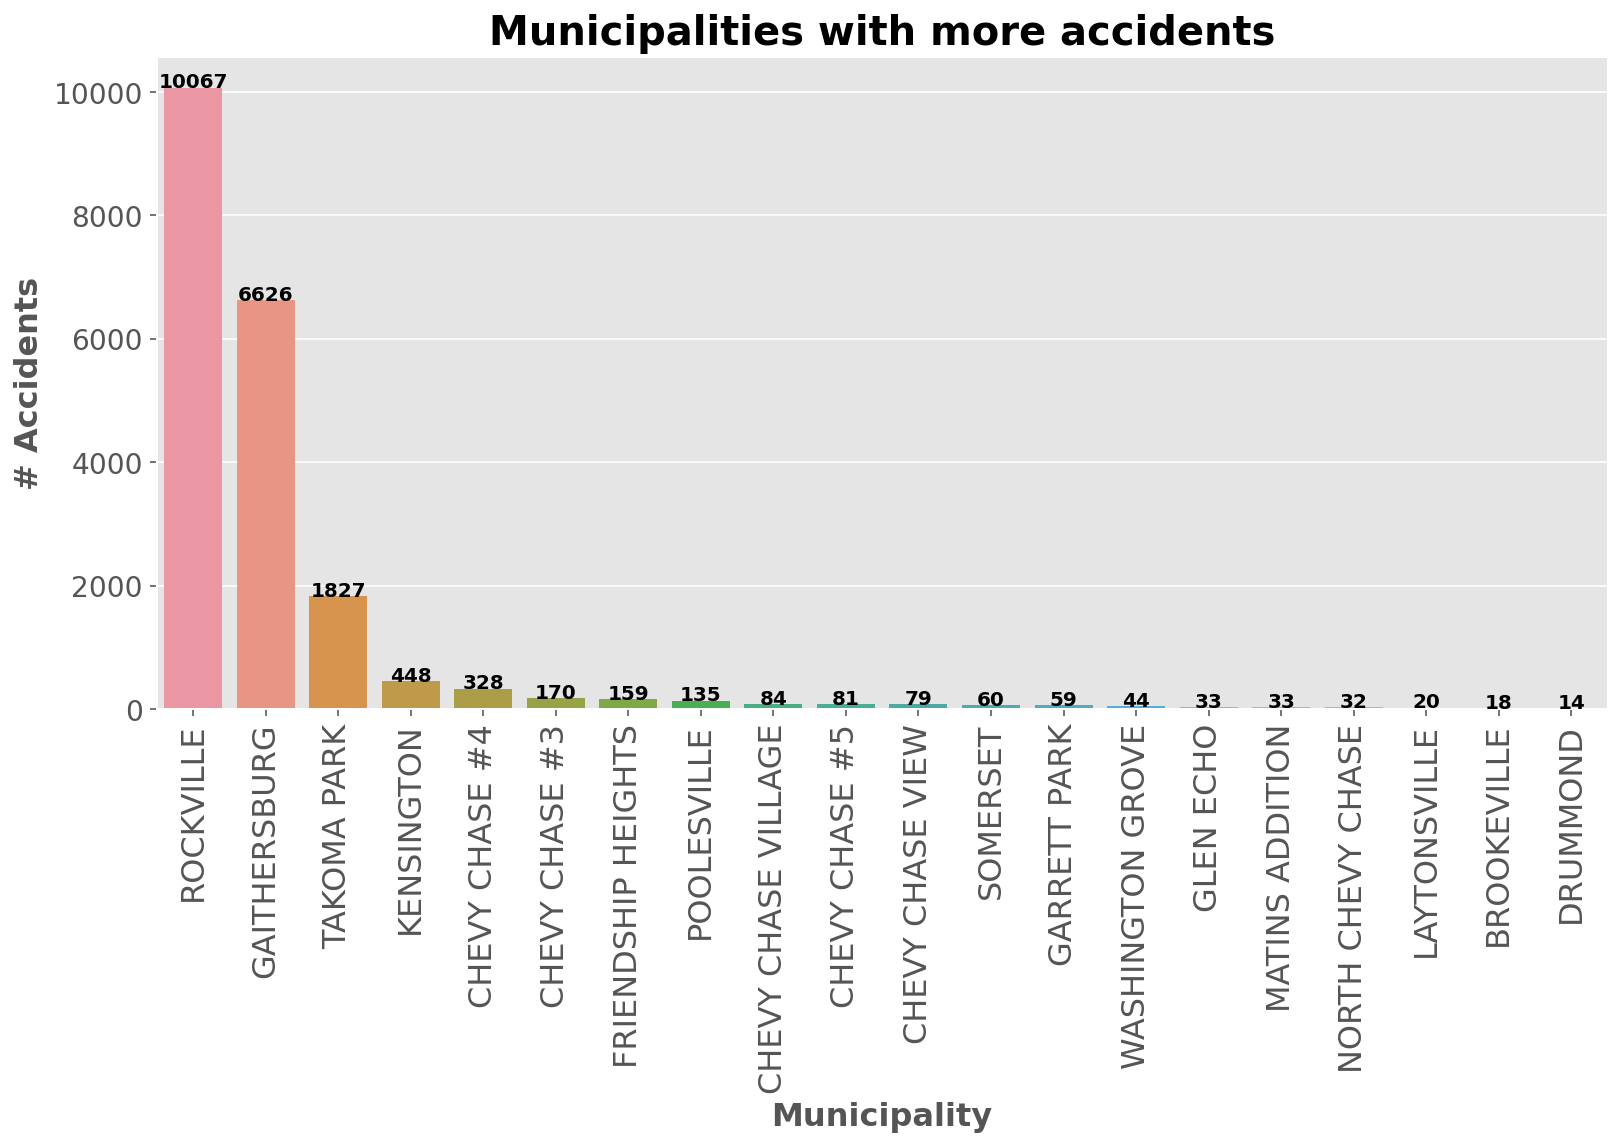

In [241]:
# Visualization
plt.figure(figsize=(13,6))
x = df['municipality'].value_counts().index
y = df['municipality'].value_counts()
ax = sns.barplot(x=x, y=y)
plt.title("Municipalities with more accidents", fontsize=20).set_weight('bold')
value_barplot_label(ax)
ax.set_ylabel('# Accidents', fontsize=16).set_weight('bold')
ax.set_xlabel('Municipality', fontsize=16).set_weight('bold')
tick_format(ax,1)

### Vehicles
Body type of the vehicle involved in the crash

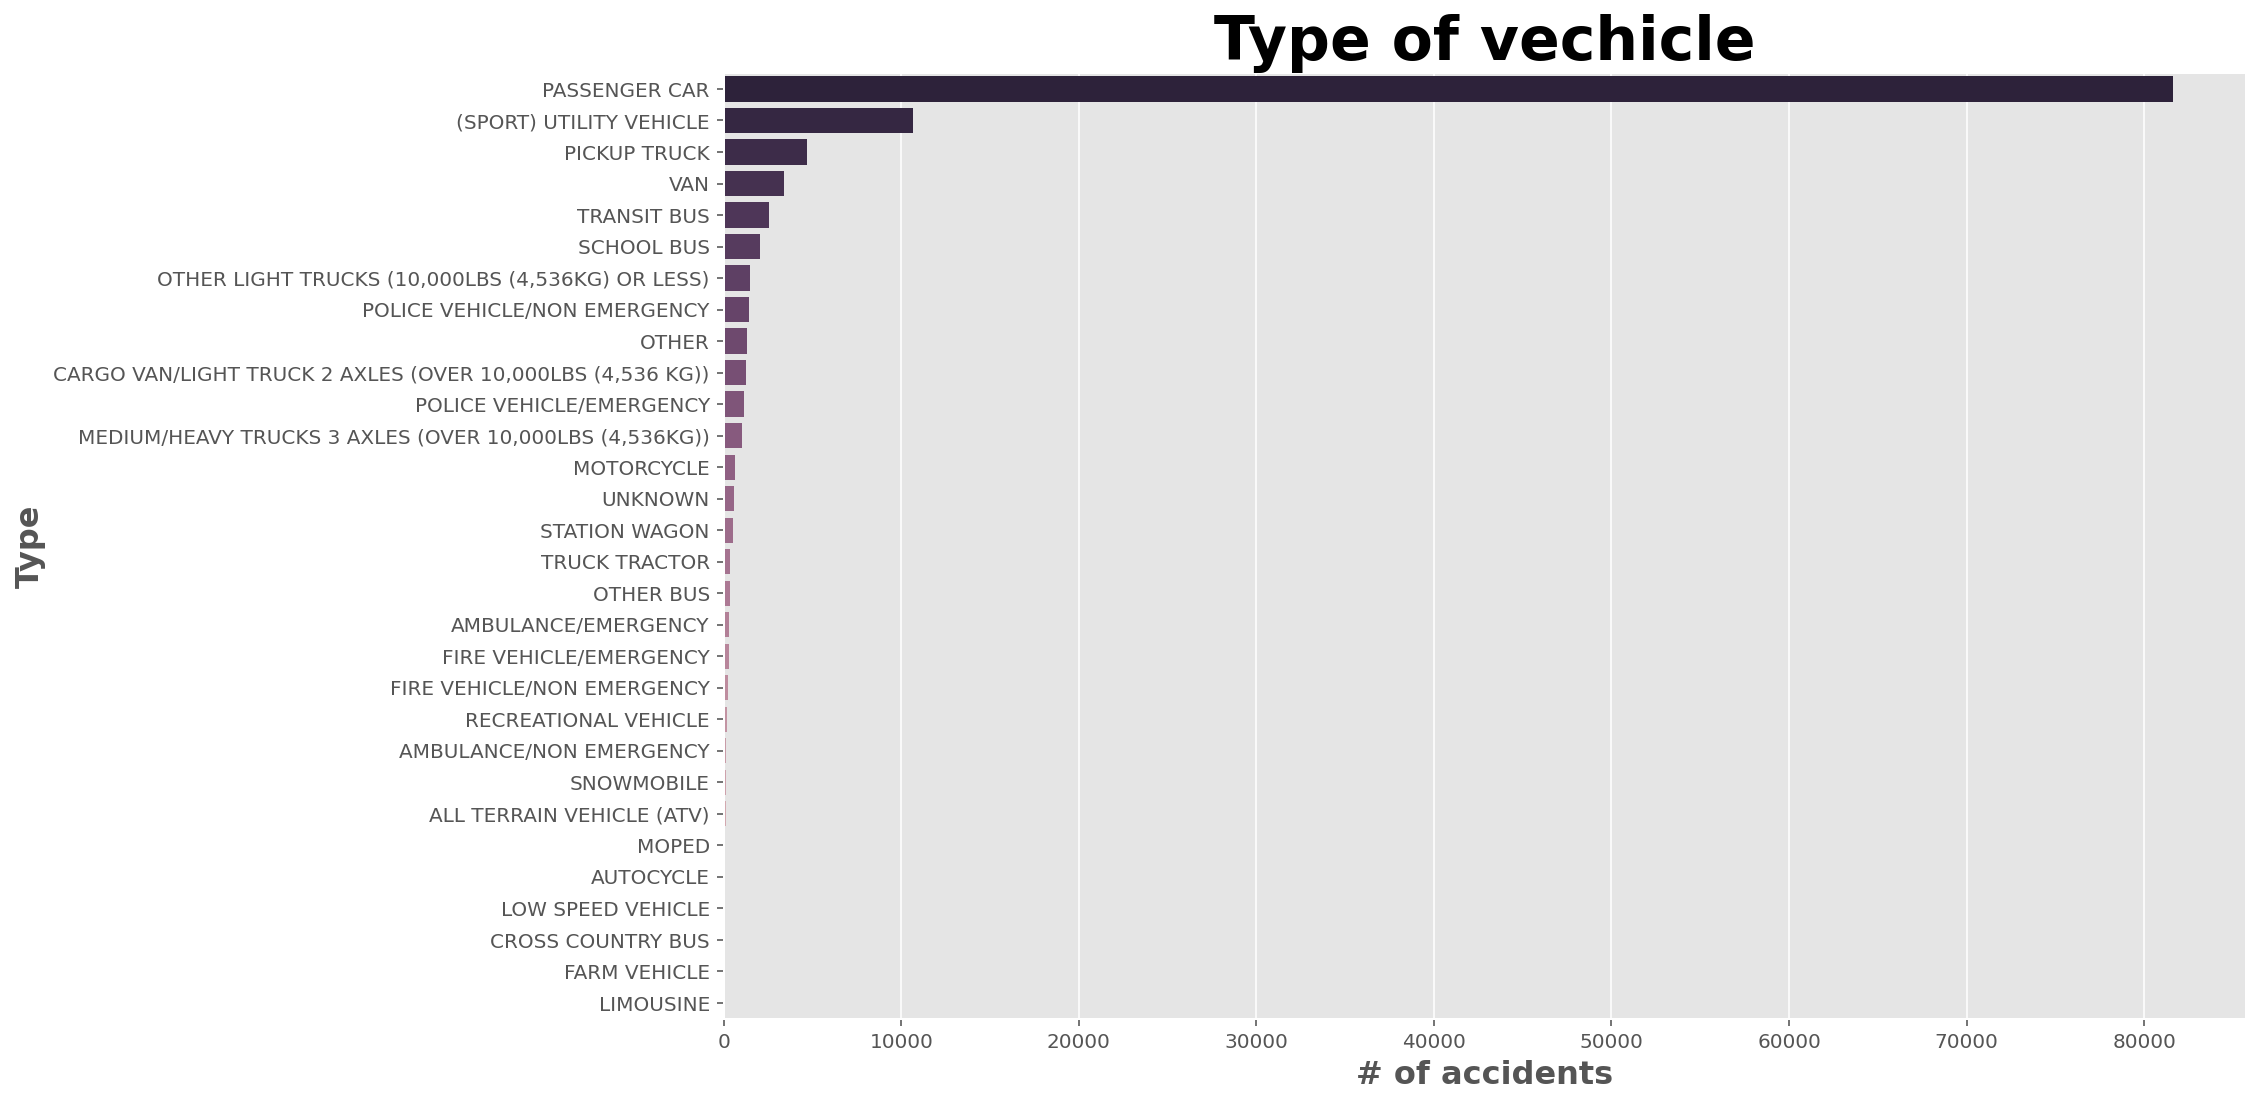

In [242]:
typeofvehicle = df['vehicle_body_type'].value_counts()
fig = plt.figure(figsize=(30,40))
ax1 = fig.add_subplot(421)
ax1 = sns.barplot(x=typeofvehicle, 
                 y=typeofvehicle.index, 
                 palette=sns.cubehelix_palette(reverse=True, n_colors=len(typeofvehicle.index)),
                 ax=ax1)
plt.title("Type of vechicle", fontsize=30).set_weight('bold')
ax1.set_ylabel('Type', fontsize=16).set_weight('bold')
ax1.set_xlabel('# of accidents', fontsize=16).set_weight('bold')

### Non-Motorists
Type of non-motorist.

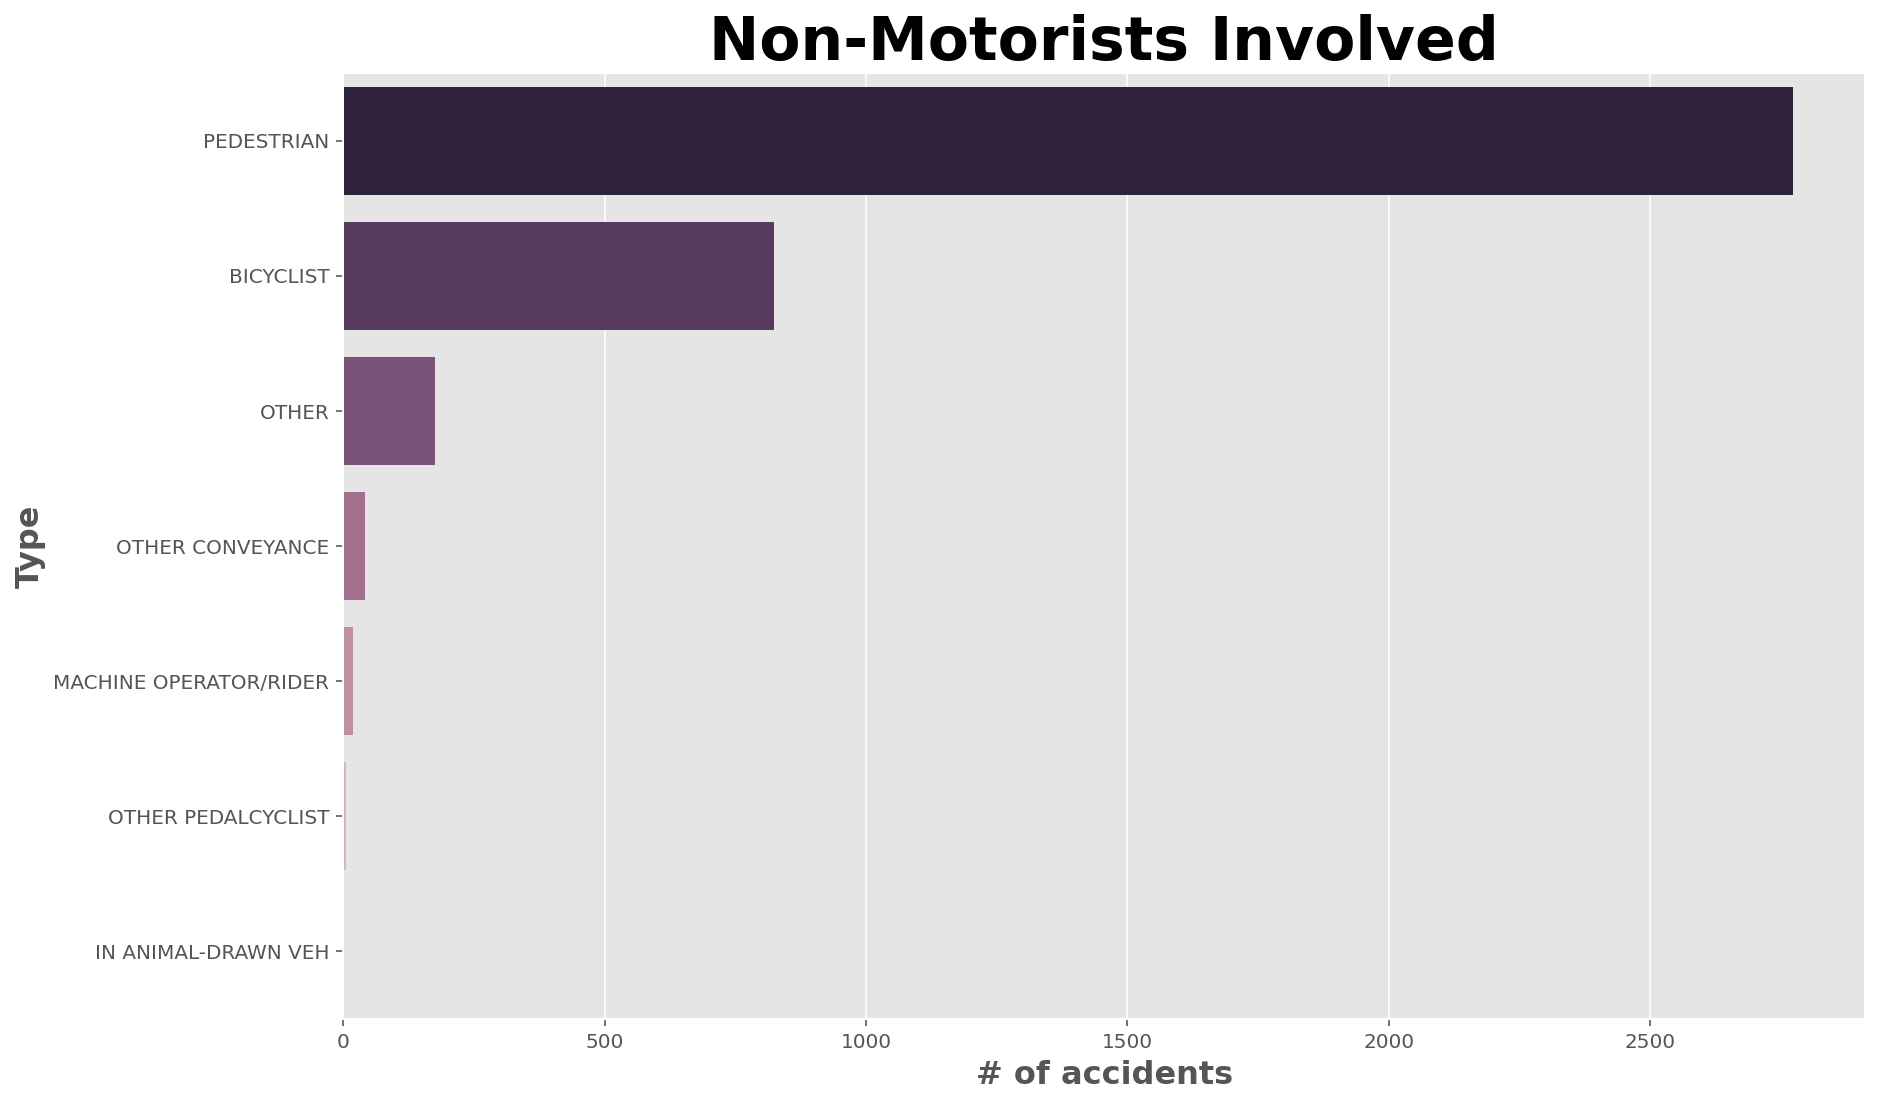

In [243]:
typeofpedestrian = df['pedestrian_type'].value_counts()
fig = plt.figure(figsize=(30,40))
ax1 = fig.add_subplot(421)
ax1 = sns.barplot(x=typeofpedestrian, 
                 y=typeofpedestrian.index, 
                 palette=sns.cubehelix_palette(reverse=True, n_colors=len(typeofpedestrian.index)),
                 ax=ax1)
plt.title("Non-Motorists Involved", fontsize=30).set_weight('bold')
ax1.set_ylabel('Type', fontsize=16).set_weight('bold')
ax1.set_xlabel('# of accidents', fontsize=16).set_weight('bold')

### Road
Condition of roadway surface.

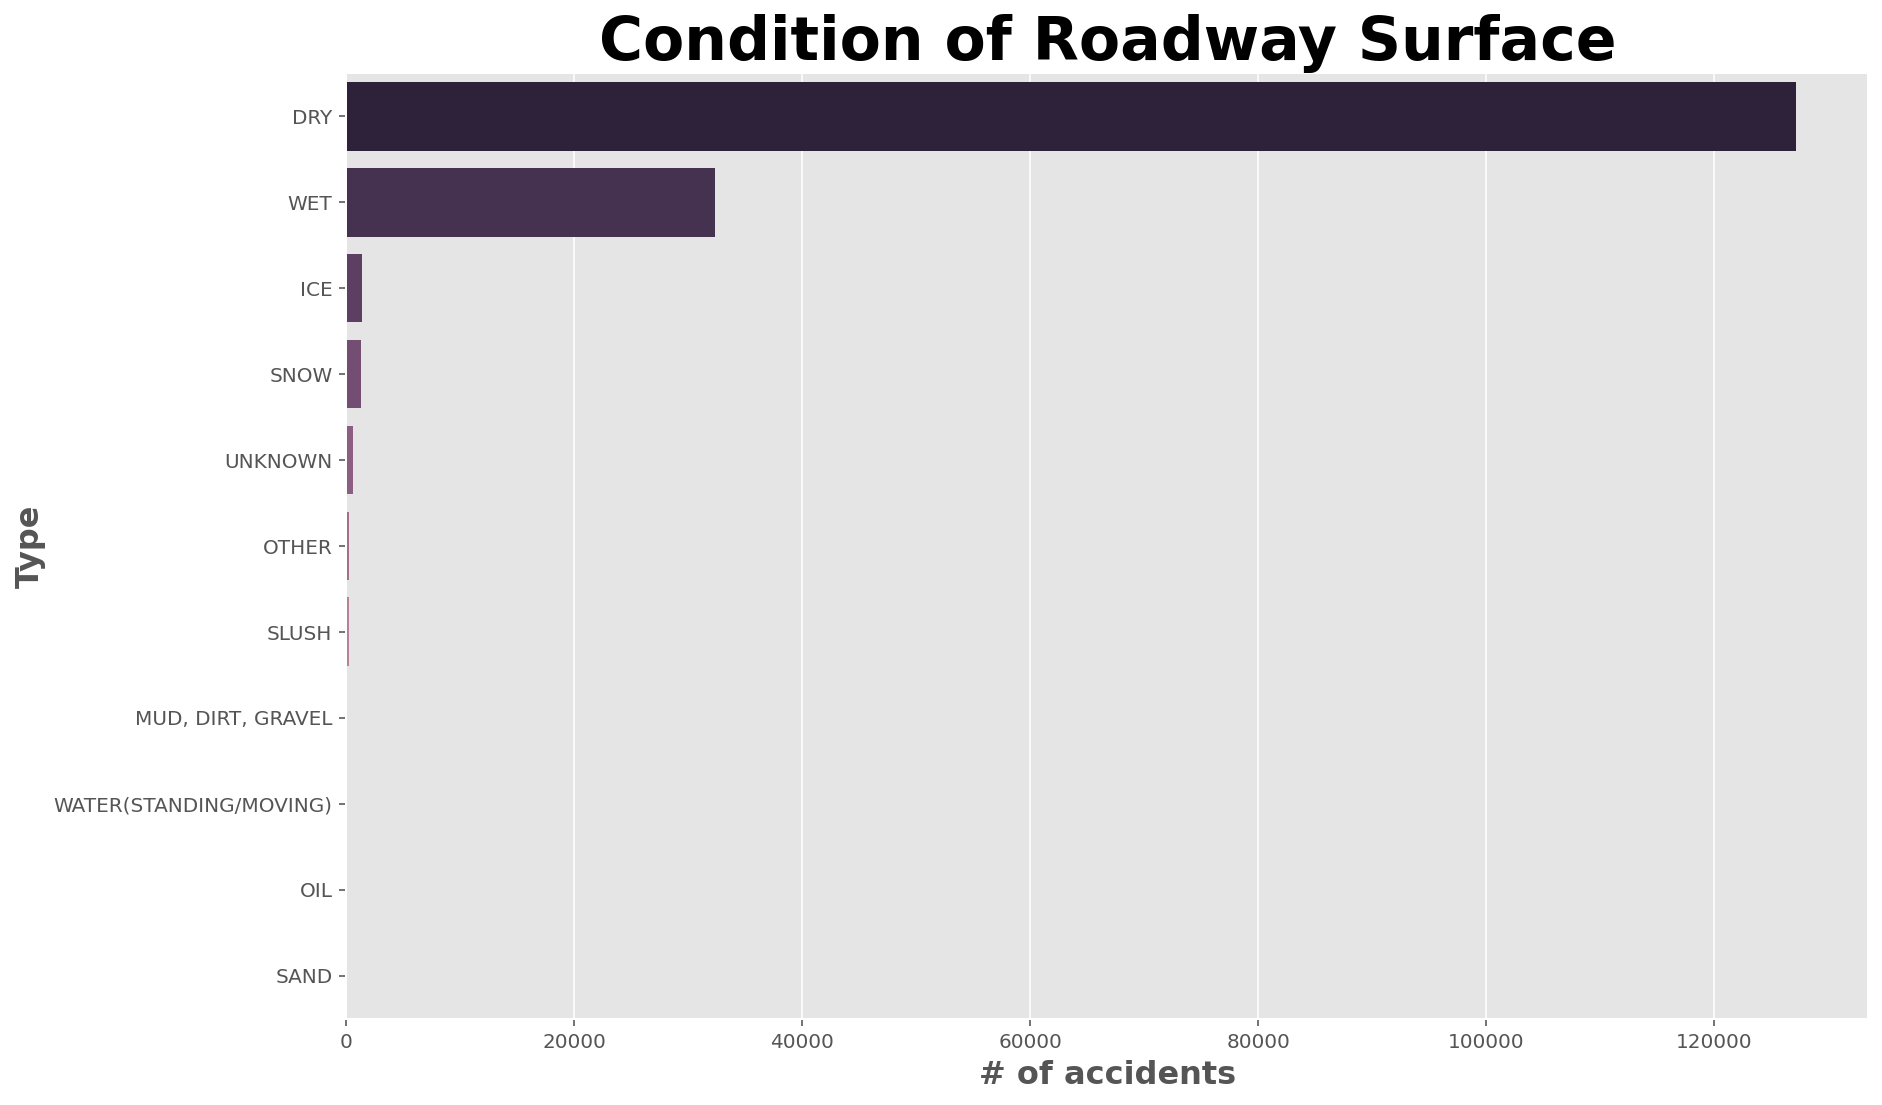

In [244]:
roadway_surface = df['surface_condition'].value_counts()
fig = plt.figure(figsize=(30,40))
ax1 = fig.add_subplot(421)
ax1 = sns.barplot(x=roadway_surface, 
                 y=roadway_surface.index, 
                 palette=sns.cubehelix_palette(reverse=True, n_colors=len(roadway_surface.index)),
                 ax=ax1)
plt.title("Condition of Roadway Surface", fontsize=30).set_weight('bold')
ax1.set_ylabel('Type', fontsize=16).set_weight('bold')
ax1.set_xlabel('# of accidents', fontsize=16).set_weight('bold')

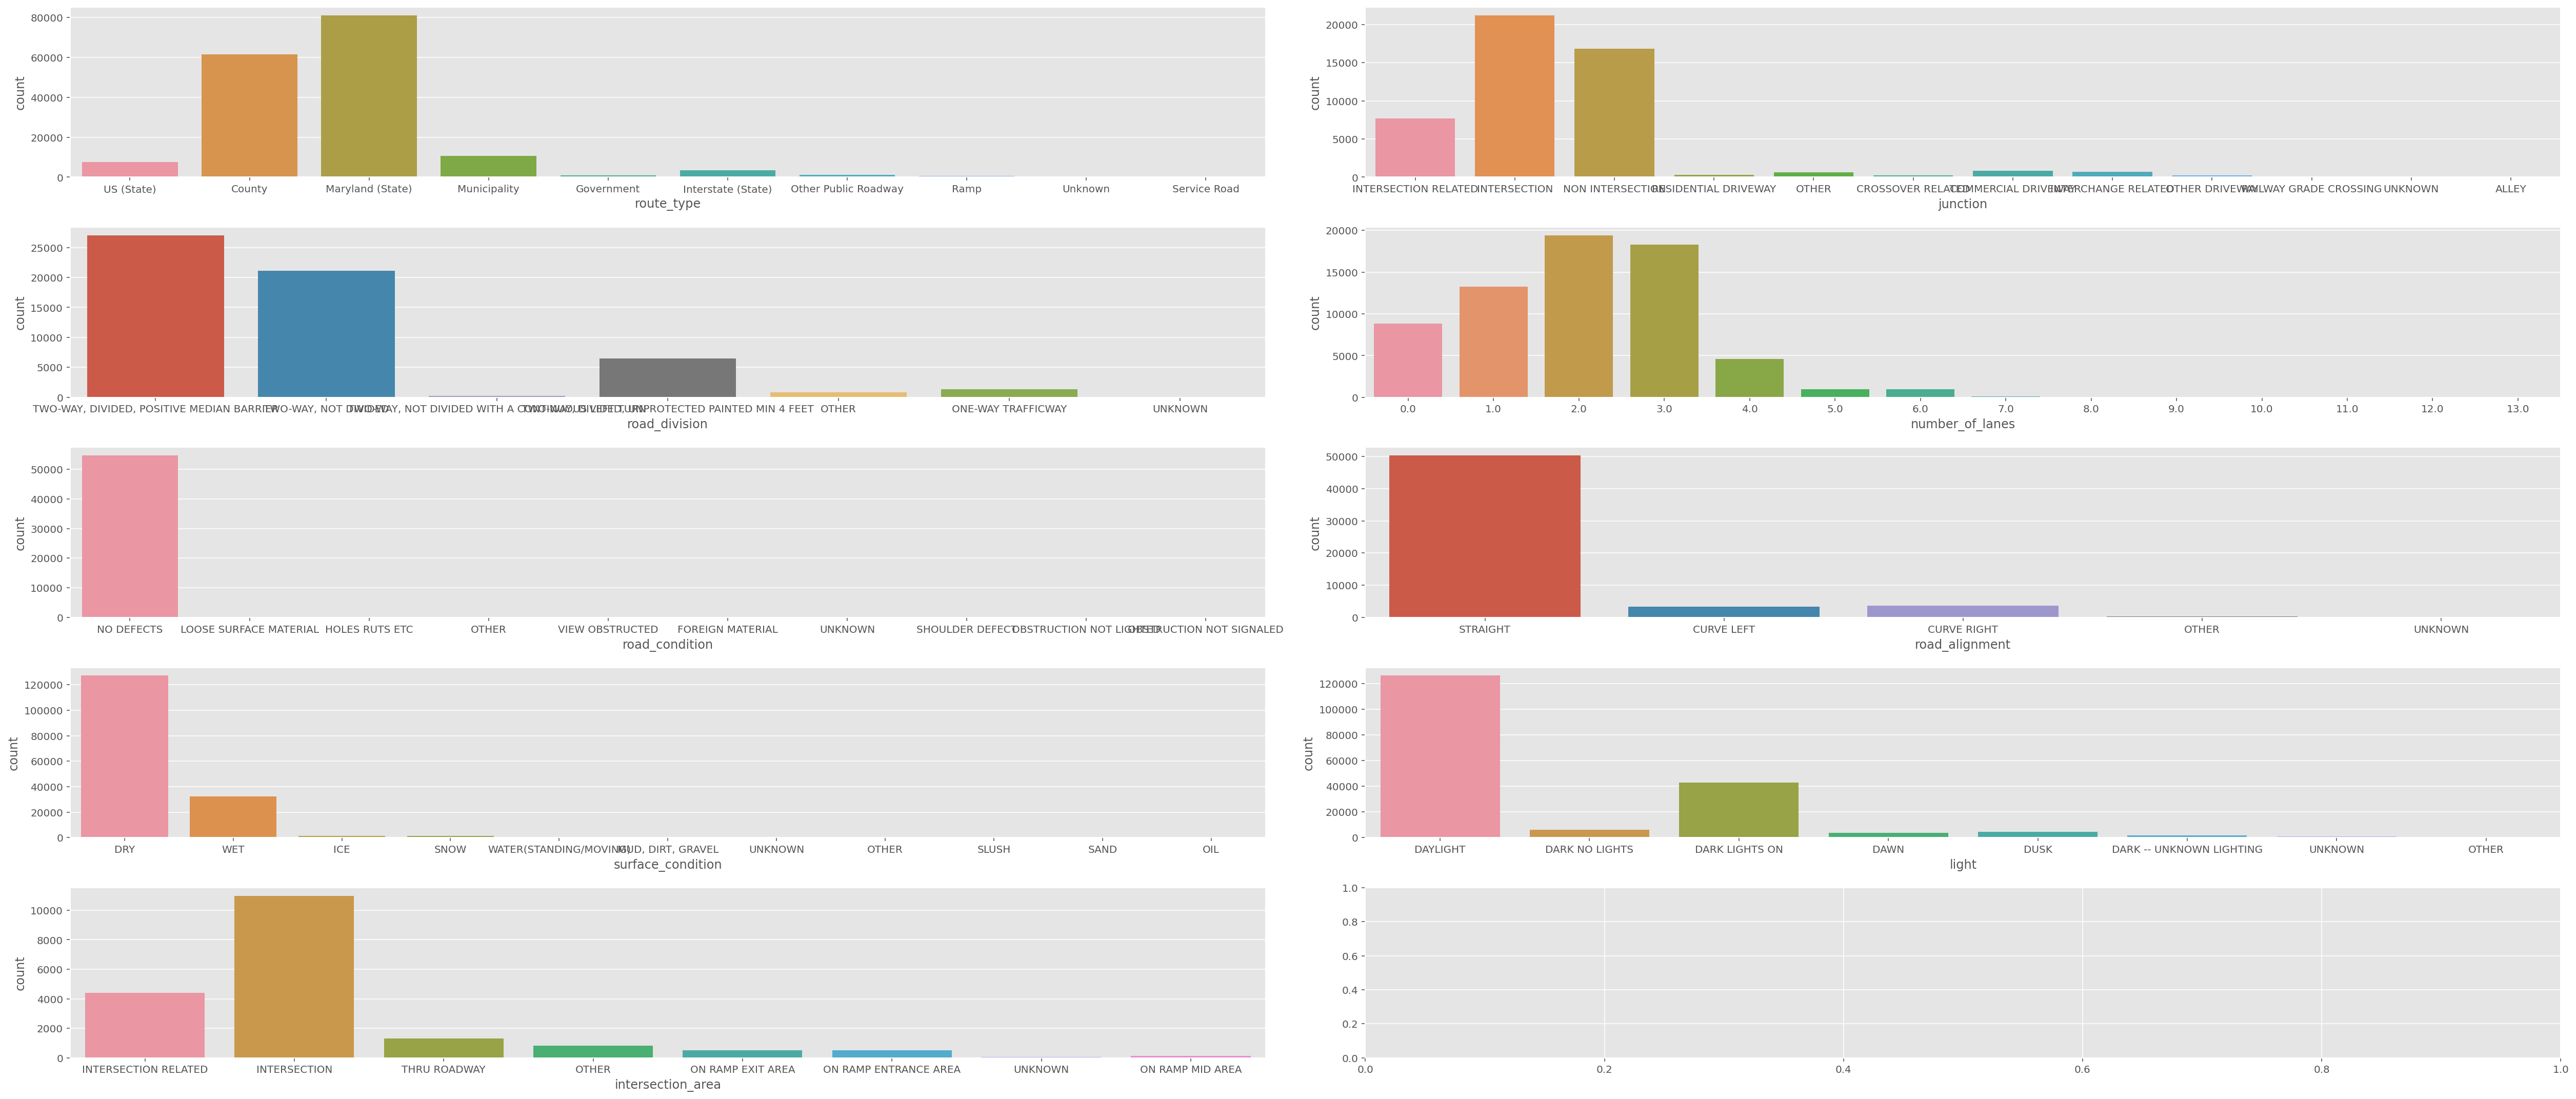

In [245]:
fig, ax = plt.subplots(5, 2, figsize = (35, 15));

sns.countplot(x='route_type',data=df, ax=ax[0,0])
sns.countplot(x="junction",data=df,  ax=ax[0,1])
sns.countplot(x='road_division',data=df, ax=ax[1,0])
sns.countplot(x='number_of_lanes',data=df, ax=ax[1,1])
sns.countplot(x='road_condition',data=df, ax=ax[2,0])
sns.countplot(x='road_alignment',data=df,  ax=ax[2,1])
sns.countplot(x='surface_condition',data=df, ax=ax[3,0])
sns.countplot(x='light',data=df, ax=ax[3,1])
sns.countplot(x='intersection_area',data=df, ax=ax[4,0])

plt.tight_layout()

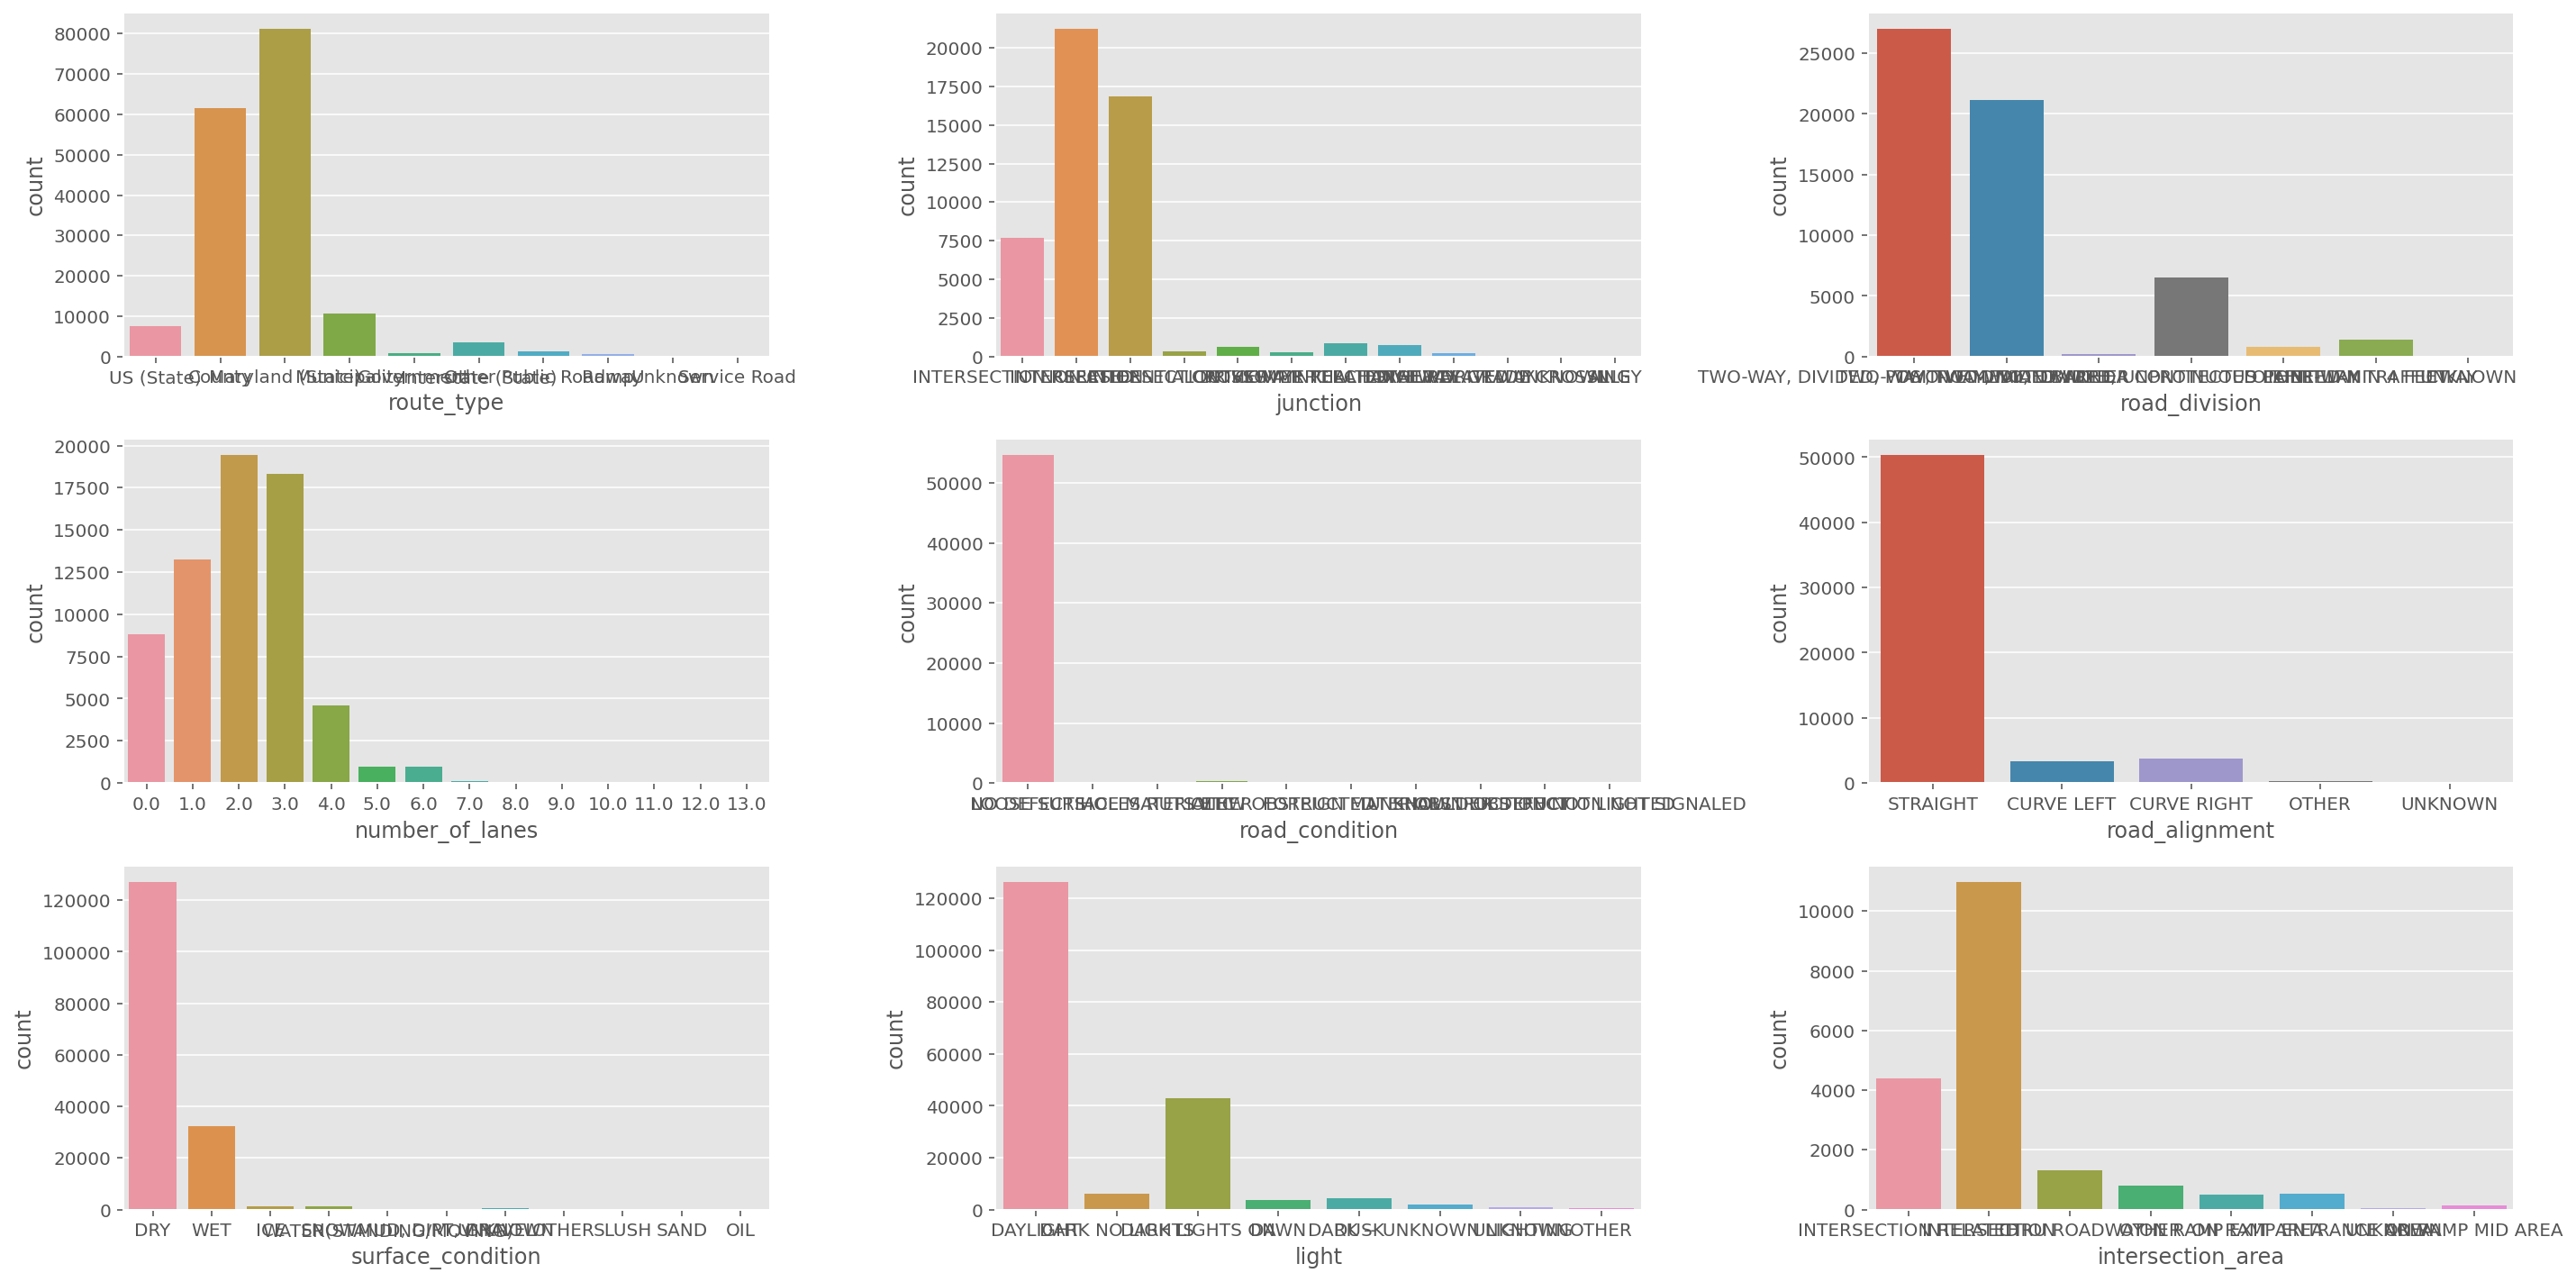

In [246]:
fig, ax = plt.subplots(3, 3, figsize = (20, 10));

sns.countplot(x='route_type',data=df, ax=ax[0,0])
sns.countplot(x="junction",data=df,  ax=ax[0,1])
sns.countplot(x='road_division',data=df, ax=ax[0,2])
sns.countplot(x='number_of_lanes',data=df, ax=ax[1,0])
sns.countplot(x='road_condition',data=df, ax=ax[1,1])
sns.countplot(x='road_alignment',data=df,  ax=ax[1,2])
sns.countplot(x='surface_condition',data=df, ax=ax[2,0])
sns.countplot(x='light',data=df, ax=ax[2,1])
sns.countplot(x='intersection_area',data=df, ax=ax[2,2])

plt.tight_layout()

### Crash
Identifies crash as property, injury, or fatal.

In [124]:
# Create new columns
#convert the column to datetime first using
import datetime as dt

df['DateTime'] = pd.to_datetime(df['crash_date_time'])
#df['Date'] = df['DateTime'].dt.strftime('%d/%m/%Y')
df['Day'] = df['DateTime'].dt.strftime('%d')
df['Month'] = df['DateTime'].dt.strftime('%m')
df['Year'] = df['DateTime'].dt.strftime('%Y')
#df['Time'] = df['DateTime'].dt.strftime('%H:%M')
df['Hour'] = df['DateTime'].dt.strftime('%H')
df['Dayofweek'] = df['DateTime'].dt.day_name()


In [127]:
start_year = df.Year.min()
end_year = df.Year.max()

# A count of the number of fatal casualties associated with crashes.
fatal = (df['acrs_report_type'].values == 'Fatal Crash').sum()

injury = (df['acrs_report_type'].values == 'Injury Crash').sum()

propertyDamage = (df['acrs_report_type'].values == 'Property Damage Crash').sum()

print("The total death in car crash accidents since the year {}, up to {} is {}.".format(start_year, end_year,fatal))
print("While the total number of injuries and properties damage in car accidents reach {}, {} respectively".format(injury,propertyDamage))

The total death in car crash accidents since the year 2015, up to 2020 is 528.
While the total number of injuries and properties damage in car accidents reach 71372, 116469 respectively


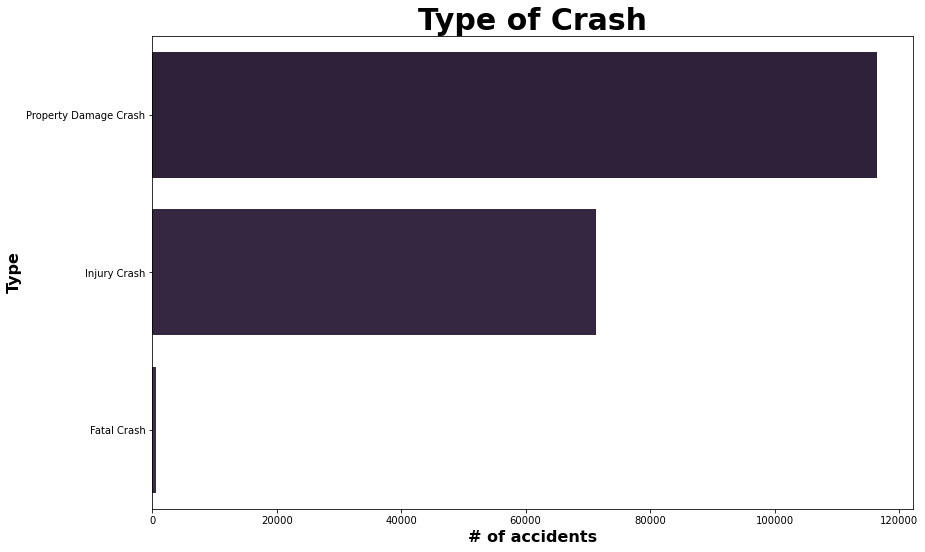

In [128]:
crashIdentificaton = df['acrs_report_type'].value_counts()
fig = plt.figure(figsize=(30,40))
ax1 = fig.add_subplot(421)
ax1 = sns.barplot(x=crashIdentificaton, 
                 y=crashIdentificaton.index, 
                 palette=sns.cubehelix_palette(reverse=True, n_colors=len(typeofvehicle.index)),
                 ax=ax1)
plt.title("Type of Crash", fontsize=30).set_weight('bold')
ax1.set_ylabel('Type', fontsize=16).set_weight('bold')
ax1.set_xlabel('# of accidents', fontsize=16).set_weight('bold')

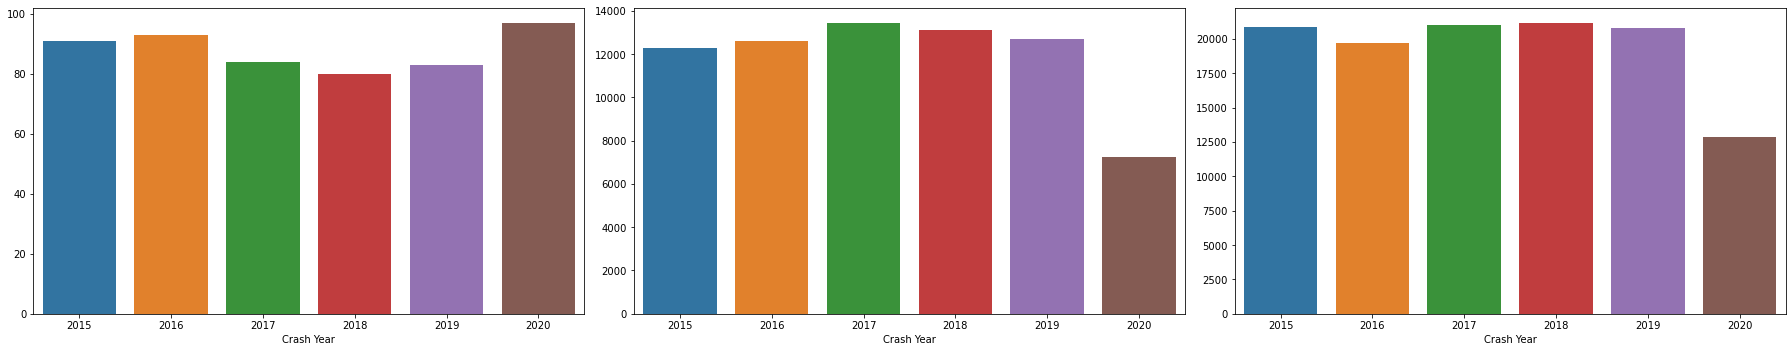

In [129]:
fig, ax = plt.subplots(1, 3, figsize = (25, 5));

                              
sns.barplot(x=df['Year'].value_counts().index, y=df.groupby(['Year']).acrs_report_type.value_counts().loc[:,'Fatal Crash'].tolist(), ax=ax[0]);
sns.barplot(x=df['Year'].value_counts().index, y=df.groupby(['Year']).acrs_report_type.value_counts().loc[:,'Injury Crash'].tolist(), ax=ax[1]);
sns.barplot(x=df['Year'].value_counts().index, y=df.groupby(['Year']).acrs_report_type.value_counts().loc[:,'Property Damage Crash'].tolist(), ax=ax[2]);
[ax[i].set_xlabel('Crash Year') for i in range(3)]
plt.tight_layout()

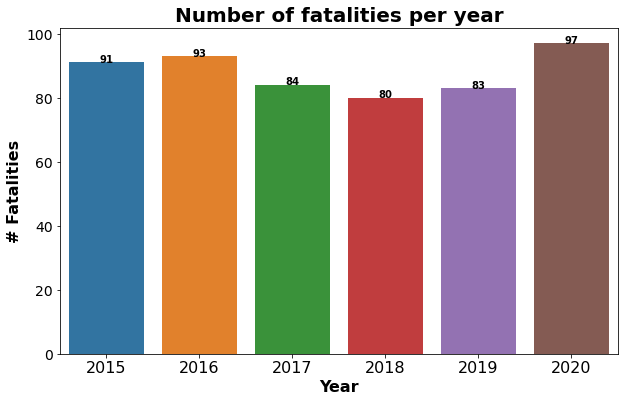

In [130]:
# Visualize Number of Fatalities per year
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df['Year'].value_counts().index, y=df.groupby(['Year']).acrs_report_type.value_counts().loc[:,'Fatal Crash'].tolist())
plt.title("Number of fatalities per year", fontsize=20).set_weight('bold')
value_barplot_label(ax)
ax.set_ylabel('# Fatalities', fontsize=16).set_weight('bold')
ax.set_xlabel('Year', fontsize=16).set_weight('bold')
tick_format(ax,2)

### Accidents

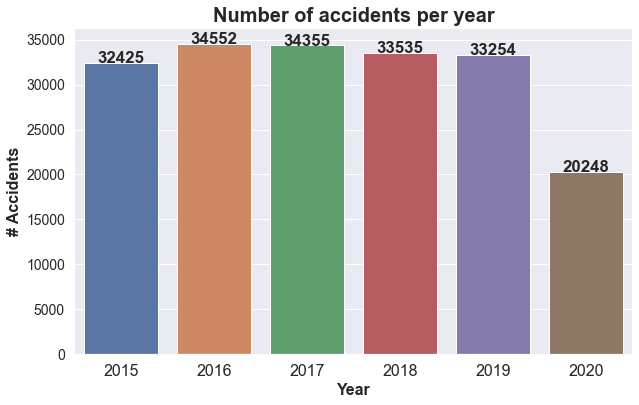

In [134]:
# Visualize Number of Incidents per year
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df['Year'].value_counts().index, y=df['Year'].value_counts())
plt.title("Number of accidents per year", fontsize=20).set_weight('bold')
value_barplot_label(ax)
ax.set_ylabel('# Accidents', fontsize=16).set_weight('bold')
ax.set_xlabel('Year', fontsize=16).set_weight('bold')
tick_format(ax,2)

Text(0.5, 1.0, 'Accidents per day of week per hour')

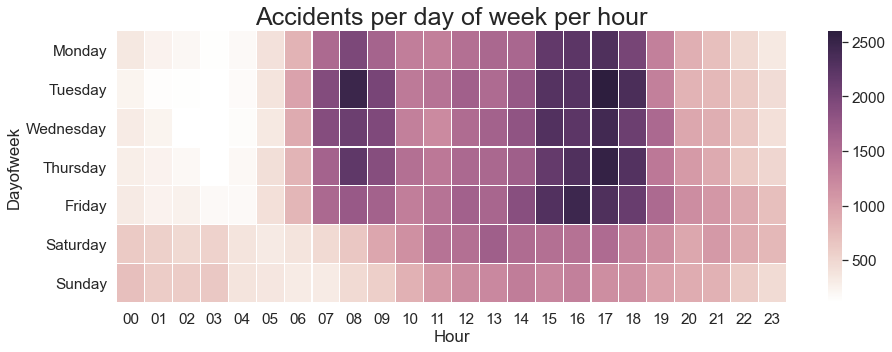

In [132]:
# Visualize Accidents per day of week per hour
sns.set(font_scale=1.4)
heat_data=df.groupby(['Dayofweek', 'Hour'])['Year'].count().to_frame().unstack()
heat_data.columns = heat_data.columns.droplevel()
heat_data = heat_data.reindex(index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                        'Friday', 'Saturday', 'Sunday'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.figure(figsize=(15,5))
sns.heatmap(heat_data,linewidths=.2,cmap=cmap)
plt.title('Accidents per day of week per hour', fontsize=25)

Text(0.5, 1.0, 'Accidents per month of year per hour')

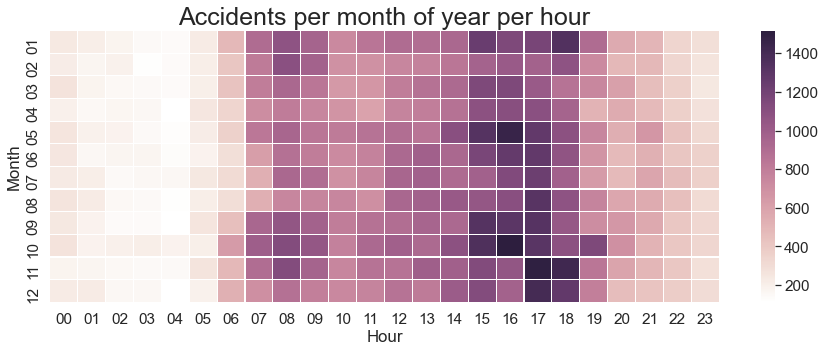

In [133]:
# Visualize Accidents per month of year per hour
sns.set(font_scale=1.4)
heat_data=df.groupby(['Month', 'Hour'])['Year'].count().to_frame().unstack()
heat_data.columns = heat_data.columns.droplevel()
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.figure(figsize=(15,5))
sns.heatmap(heat_data,linewidths=.2,cmap=cmap)
plt.title('Accidents per month of year per hour', fontsize=25)

# CLEANING DATA
Before we start to draw conclusions using our data, we are going to clean it. The first cleaning step consists of dropping unnecessary columns to simplify the dataframe.

As we can observe, the dataframe contains xx columns. We can easily print a list with column names using the **pandas.DataFrame.columns** method. Additionally, the **pandas.DataFrame.info** method provides information about a DataFrame including column types, non-null values and memory usage.

As we can see, all columns  contain null values. Since we do not need to take into consideration the null values. 
Before we start to draw conclusions using our data, we are going to clean it. The first cleaning step consists of dropping unnecessary columns to simplify the dataframe.

## Incidents Data

In [169]:
# Drop unnecessary columns.
incidentsData.drop(['local_case_number', 'agency_name', 'off_road_description', 'municipality', 'lane_type', 'related_non_motorist', 'fixed_oject_struck',  'intersection_area', 'non_motorist_substance_abuse', 'second_harmful_event'  ], axis=1 ,inplace=True)
# Columns after dropping.
#incidentsData.columns

In [170]:
incidentsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66494 entries, 0 to 66493
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   report_number           66494 non-null  object 
 1   acrs_report_type        66494 non-null  object 
 2   crash_date_time         66494 non-null  object 
 3   hit_run                 66492 non-null  object 
 4   route_type              57657 non-null  object 
 5   mile_point              58026 non-null  float64
 6   mile_point_direction    57671 non-null  object 
 7   lane_direction          58037 non-null  object 
 8   lane_number             66494 non-null  int64  
 9   number_of_lanes         66494 non-null  int64  
 10  direction               58026 non-null  object 
 11  distance                59892 non-null  float64
 12  distance_unit           58036 non-null  object 
 13  road_grade              57572 non-null  object 
 14  nontraffic              66494 non-null

In [171]:
incidentsData.dropna(inplace=True)
#print(incidentsData)

In [172]:
incidentsData.shape

(21514, 34)

In [173]:
incidentsData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21514 entries, 5 to 66490
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   report_number           21514 non-null  object 
 1   acrs_report_type        21514 non-null  object 
 2   crash_date_time         21514 non-null  object 
 3   hit_run                 21514 non-null  object 
 4   route_type              21514 non-null  object 
 5   mile_point              21514 non-null  float64
 6   mile_point_direction    21514 non-null  object 
 7   lane_direction          21514 non-null  object 
 8   lane_number             21514 non-null  int64  
 9   number_of_lanes         21514 non-null  int64  
 10  direction               21514 non-null  object 
 11  distance                21514 non-null  float64
 12  distance_unit           21514 non-null  object 
 13  road_grade              21514 non-null  object 
 14  nontraffic              21514 non-null

In [174]:
incidentsData.columns

Index(['report_number', 'acrs_report_type', 'crash_date_time', 'hit_run',
       'route_type', 'mile_point', 'mile_point_direction', 'lane_direction',
       'lane_number', 'number_of_lanes', 'direction', 'distance',
       'distance_unit', 'road_grade', 'nontraffic', 'road_name',
       'cross_street_type', 'cross_street_name', 'at_fault', 'collision_type',
       'weather', 'surface_condition', 'light', 'traffic_control',
       'driver_substance_abuse', 'first_harmful_event', 'junction',
       'intersection_type', 'road_alignment', 'road_condition',
       'road_division', 'latitude', 'longitude', 'location'],
      dtype='object')

## Driver Data

In [119]:
# Drop unnecessary columns.
driversData.drop(['speed_limit','latitude','longitude','vehicle_year', 'off_road_description', 'municipality', 'related_non_motorist', 'non_motorist_substance_abuse', 'circumstance'], axis=1 ,inplace=True)
# Columns after dropping.
#driversData.columns

In [120]:
driversData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118036 entries, 0 to 118035
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   report_number                   118036 non-null  object
 1   local_case_number               118036 non-null  object
 2   agency_name                     118036 non-null  object
 3   acrs_report_type                118036 non-null  object
 4   crash_date_time                 118036 non-null  object
 5   route_type                      106605 non-null  object
 6   road_name                       107187 non-null  object
 7   cross_street_type               106591 non-null  object
 8   cross_street_name               107183 non-null  object
 9   collision_type                  117637 non-null  object
 10  weather                         108732 non-null  object
 11  surface_condition               104097 non-null  object
 12  light                         

In [121]:
driversData.dropna(inplace=True)
#print(driversData)

In [122]:
driversData.shape

(56369, 34)

## Non Motorist Data

In [250]:
# Drop unnecessary columns.
nonMotoristsData.drop(['off_road_description', 'municipality'], axis=1 ,inplace=True)
# Columns after dropping.
#nonMotoristsData.columns

In [251]:
#nonMotoristsData.info()

In [252]:
nonMotoristsData.dropna(inplace=True)
#print(nonMotoristsData)

In [253]:
nonMotoristsData.shape

(999, 30)

# Machine Learning Model to Predict Car Crash Fatality

Supervised learning describes a class of problem that involves using a model to learn a mapping between input examples and the target variable. There are two main types of supervised learning problems: they are classification that involves predicting a class label and regression that involves predicting a numerical value. We can approach the modeling part of this problem in different ways. We will approach it as a **classification problem.** We will take it as **multi-class classification** problem and predict the outcome of a crash as fataly , Injury or Property Damage. We need to classify the dependent variable that has three classes. In seeing the training dataset, the model learns patterns specific to each class and uses those patterns to predict the membership of future data. We opt for **Decsion Tree**, a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

* Category 0: Fatal (n= 518)

* Category 1: Injury  (n=70925)

* Category 2: Property Damage (n=115644)

## Multi-class Classification Assumptions
* Multi-class classification  requires the dependent variable should be measured at the nominal level.<br>
    Nominal variable include **acrs_report_type** with three categories: Fatal Crash, Injury Crash and Property Damage Crash.
* A sample can only have one class    
* Only the meaningful variables should be included.
* The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
* It requires quite large sample sizes.


## Feature Selection Methods
**Feature selection methods** are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.<br>
**Filter Method:** Select subsets of features based on their relationship with the target.
* Statistical Methods
* Feature Importance Methods

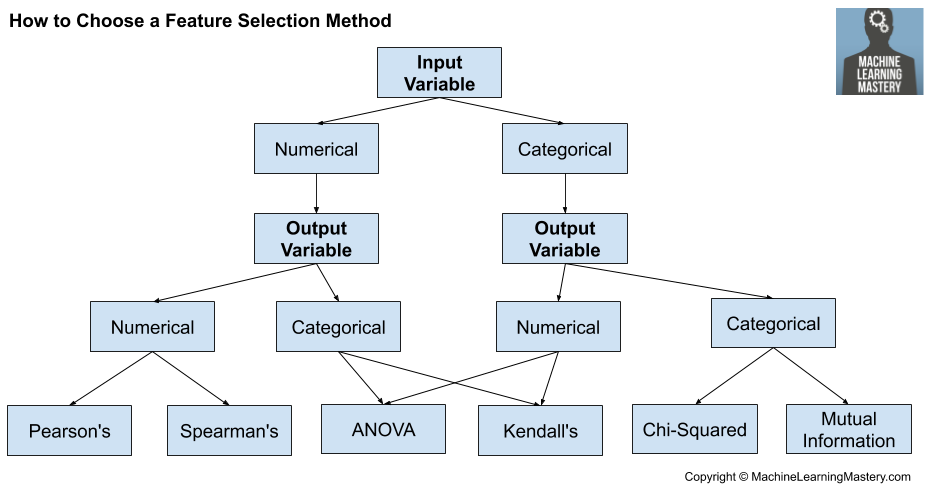

# Incidents Data 

###  Feature Selection Using F-Score
The F-Score method is a filter feature selection method that looks at the relationship between each descriptive feature and the target feature using the F-distribution. The code below returns the indices of the XX features that have the highest F-Score value sorted from the highest to the lowest. Pay attention that the wrapper is not used in any way when selecting features using the F-Score method. In some cases, the F-Score will be "NaN" for some features due to technical reasons (related to the nature of the F-distribution). For this reason, we will convert any "NaN" value to zero for a correct result via the np.nan_to_num() method.

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

In the step of data processing in machine learning, we often need to prepare our data in specific ways before feeding into a machine learning model. Machine learning models require all input and output variables to be numeric. This means that if our data contains categorical data, we must encode it to numbers before we can fit and evaluate a model.

#### Label Encoding
This approach is very simple and it involves converting each value in a column to a number. This approach requires the category column to be of ‘category’ datatype.

In [255]:
# Label encoder
from sklearn.preprocessing import LabelEncoder
lblE = LabelEncoder()
for i in incidentsData:
    if incidentsData[i].dtype == 'object':
        lblE.fit(incidentsData[i])
        incidentsData[i] = lblE.transform(incidentsData[i])

TypeError: argument must be a string or number

Though label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them. This ordering issue is addressed in another common alternative approach called ‘One-Hot Encoding’.

In [176]:
# One Hot Encoding
incidentsData = pd.get_dummies(incidentsData)

By default, the **get_dummies()** does not do dummy encoding, but One-Hot encoding.

In [177]:
#load all necessary libraries
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

import statsmodels.api as sm
import matplotlib.pyplot as plt



from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

In [178]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import feature_selection as fs
from sklearn.tree import DecisionTreeClassifier

Let's now select the best features in the dataset using different methods.

In [179]:
num_features = 13

In [180]:
Data = incidentsData.drop(columns = 'acrs_report_type').values
target = incidentsData['acrs_report_type']
#Data = preprocessing.MinMaxScaler().fit_transform(Data)
#target = preprocessing.LabelEncoder().fit_transform(target)

In [181]:
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=num_features)
fs_fit_fscore.fit_transform(Data, target)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:num_features]
fs_indices_fscore

array([17,  2, 24, 32, 30, 22, 26,  4, 25, 18,  9,  8, 31], dtype=int64)

Let's see what these 13 best features are.

In [182]:
best_features_fscore = incidentsData.columns[fs_indices_fscore].values
best_features_fscore

array(['cross_street_name', 'crash_date_time', 'driver_substance_abuse',
       'longitude', 'road_division', 'light', 'junction', 'route_type',
       'first_harmful_event', 'at_fault', 'number_of_lanes',
       'lane_number', 'latitude'], dtype=object)

Based on the Scores, we observe that, out of the top 33 features, these 13 are the most important features. 

The FScore importances of these features are given below.

In [185]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([323.28804719, 284.89566949,  46.29722118,  23.67553716,
        21.16437889,  16.54493428,  15.54338725,  14.75763837,
        14.44153472,  14.19628222,  12.53798639,  12.31138544,
        12.16996709])

We define a function for plotting so that we can plot other importance types as well corresponding to different feature selection methods.

In [186]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

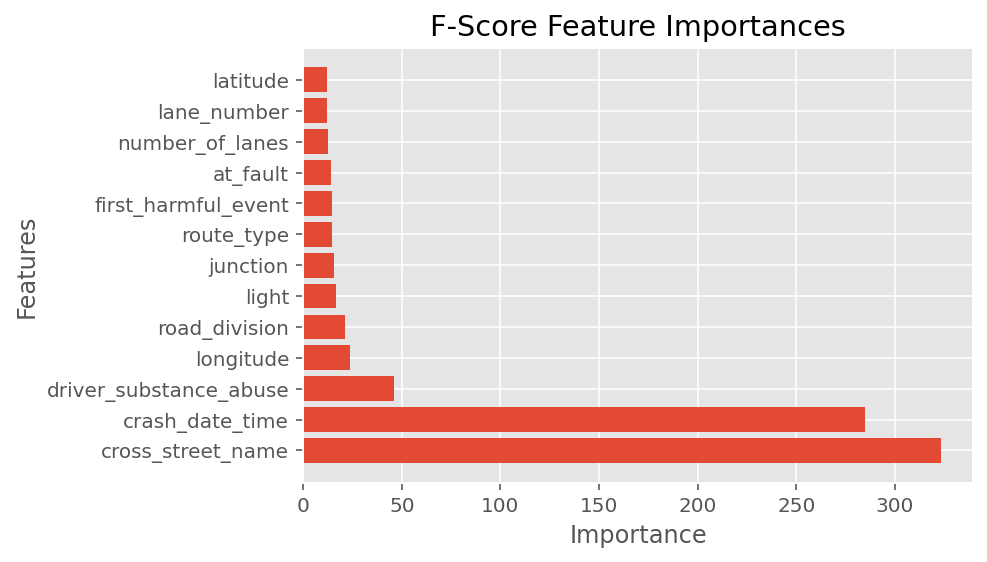

In [187]:
plot_imp(best_features_fscore, feature_importances_fscore, 'F-Score')

##  Multi Class Classification By Decison Tree
A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node.

Now we will import the Decision Tree Classifier for building the model. For that **scikit learn** is used in Python.

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [202]:
#split dataset in features and target variable
feature_cols = ['cross_street_name', 'crash_date_time', 'driver_substance_abuse',
       'longitude', 'road_division', 'light', 'junction', 'route_type',
       'first_harmful_event', 'at_fault', 'number_of_lanes',
       'lane_number', 'latitude']
Data = incidentsData[feature_cols] # Features
target = incidentsData.acrs_report_type # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(Data, target, test_size=0.3, random_state=1) # 70% training and 30% test

In [203]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Now that we have fitted the training data to a Decision Tree Classifier, it is time to predict the output of the test data.

In [204]:
predictions = dtree.predict(X_test)

Now the final step is to evaluate our model and see how well the model is performing. For that we use metrics such as **confusion matrix, precision** and **recall.**

In [205]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.27      0.21      0.24        28
           1       0.48      0.51      0.49      3051
           2       0.61      0.59      0.60      4021

    accuracy                           0.55      7100
   macro avg       0.46      0.44      0.44      7100
weighted avg       0.55      0.55      0.55      7100



**Precision** score means the the level up-to which the prediction made by the model is precise. **Recall** is the amount up-to which the model can predict the outcome. **F1** and **Support** scores are the amount of data tested for the predictions. 

In [206]:
print(confusion_matrix(y_test,predictions))  

[[   6   16    6]
 [   6 1545 1500]
 [  10 1643 2368]]


Now the model building is over but we did not see the tree yet. Now scikit learn has a built-in library for visualization of a tree but we do not use it often. For visualization, we need to install the pydot library and run the following code.

#### Visualizing Decision Trees

Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, we also need to install graphviz and pydotplus.

In [194]:
!pip install graphviz
!pip install pydotplus
!pip install --upgrade scikit-learn==0.22
from six import StringIO

Requirement already up-to-date: scikit-learn==0.22 in c:\users\salifou sylla\anaconda3\lib\site-packages (0.22)


export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.

#### Print Text Representation

In [212]:
from sklearn import tree
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_8 <= 16.50
|   |--- feature_2 <= 37.50
|   |   |--- feature_8 <= 4.50
|   |   |   |--- feature_8 <= 1.50
|   |   |   |   |--- feature_1 <= 20323.00
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_1 >  20323.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  1.50
|   |   |   |   |--- feature_12 <= 39.24
|   |   |   |   |   |--- feature_3 <= -76.97
|   |   |   |   |   |   |--- feature_12 <= 38.98
|   |   |   |   |   |   |   |--- feature_1 <= 13924.00
|   |   |   |   |   |   |   |   |--- feature_3 <= -77.05
|   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |--- feature_3 >  -77.05
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_1 >  13924.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_12 >  38.98
|   |   |   |   |   |   |   |--- feature_1 <= 14334.00
|   |   |   |   |   |   |   |   |--- feature_6 <= 5.50
|   |   |   |   |   |   |   |

It can be saved into a file through the following code:


In [213]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

### Plot Tree with plot_tree
The plot_tree method was added to sklearn in version 0.21. It requires matplotlib to be installed. It allows us to easily produce figure of the tree (without intermediate exporting to graphviz) 

In [225]:
#fig = plt.figure(figsize=(30,25))
#p = tree.plot_tree(dtree, 
                  # feature_names=incidentsData[feature_cols],  
                  # class_names=target,
                  # filled=True)
#p

In [226]:
import graphviz
# DOT data
#dot_data = tree.export_graphviz(dtree, out_file=None, 
                               # feature_names=Data,  
                                #class_names=target,
                                #filled=True)

# Draw graph
#graph = graphviz.Source(dot_data, format="png") 
#graph

# Non Motorists Data 

### Multi Class Classification using Random Forest

### Feature Selection 
The random forest importance (RFI) method is a filter feature selection method that uses the total decrease in node impurities from splitting on a particular feature as averaged over all decision trees in the ensemble. For classification, the node impurity is measured by the Gini index and for regression, it is measured by residual sum of squares. Let's perform RFI feature selection using 100 trees.

In [256]:
# Label encoder
from sklearn.preprocessing import LabelEncoder
lblE = LabelEncoder()
for i in nonMotoristsData:
    if nonMotoristsData[i].dtype == 'object':
        lblE.fit(nonMotoristsData[i])
        nonMotoristsData[i] = lblE.transform(nonMotoristsData[i])


In [257]:
# One Hot Encoding
nonMotoristsData = pd.get_dummies(nonMotoristsData)

In [258]:
nonMotoristsData

,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,route_type,road_name,cross_street_type,cross_street_name,related_non_motorist,...,pedestrian_actions,pedestrian_location,pedestrian_obeyed_traffic_signal,pedestrian_visibility,at_fault,injury_severity,safety_equipment,latitude,longitude,location
5,867,200024075,5,1,369,0,33,0,78,0,...,8,0,1,3,0,3,2,39.052860,-77.069679,462
6,134,190026354,1,1,326,3,214,8,460,0,...,10,8,0,0,2,3,2,39.157775,-77.204002,874
10,67,200023294,7,1,366,3,321,4,19,7,...,8,8,2,3,0,2,2,39.074521,-77.115642,589
11,932,200024693,5,1,377,7,69,6,401,0,...,8,8,1,0,0,4,2,39.014222,-77.016631,282
12,856,200022784,5,1,344,3,136,0,43,7,...,11,8,5,2,1,3,2,39.043102,-77.051992,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3821,753,16021317,5,1,260,3,131,0,313,0,...,7,8,1,3,2,3,2,39.180768,-77.238629,927
3828,640,16032703,5,1,381,0,293,3,203,7,...,8,8,2,3,0,2,2,39.053167,-77.050735,470
3831,948,16041699,5,1,509,0,128,1,449,0,...,8,8,1,3,0,3,2,39.016093,-77.032545,298
3832,36,16000618,7,1,7,4,224,4,303,7,...,0,9,1,0,2,2,2,39.090810,-77.153656,702


In [259]:
Data = nonMotoristsData.drop(columns = 'acrs_report_type').values
target = nonMotoristsData['acrs_report_type']

In [260]:
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(Data, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

Here are the best features selected by RFI.

In [261]:
best_features_rfi = nonMotoristsData.columns[fs_indices_rfi].values
best_features_rfi

array(['at_fault', 'pedestrian_movement', 'report_number',
       'driver_substance_abuse', 'acrs_report_type', 'safety_equipment',
       'longitude', 'cross_street_type', 'non_motorist_substance_abuse',
       'latitude', 'local_case_number', 'route_type', 'surface_condition'],
      dtype=object)

In [262]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.57542357, 0.04066055, 0.03443466, 0.0246842 , 0.02465644,
       0.02448553, 0.02413261, 0.02303851, 0.02238923, 0.02202403,
       0.02193688, 0.020588  , 0.01634564])

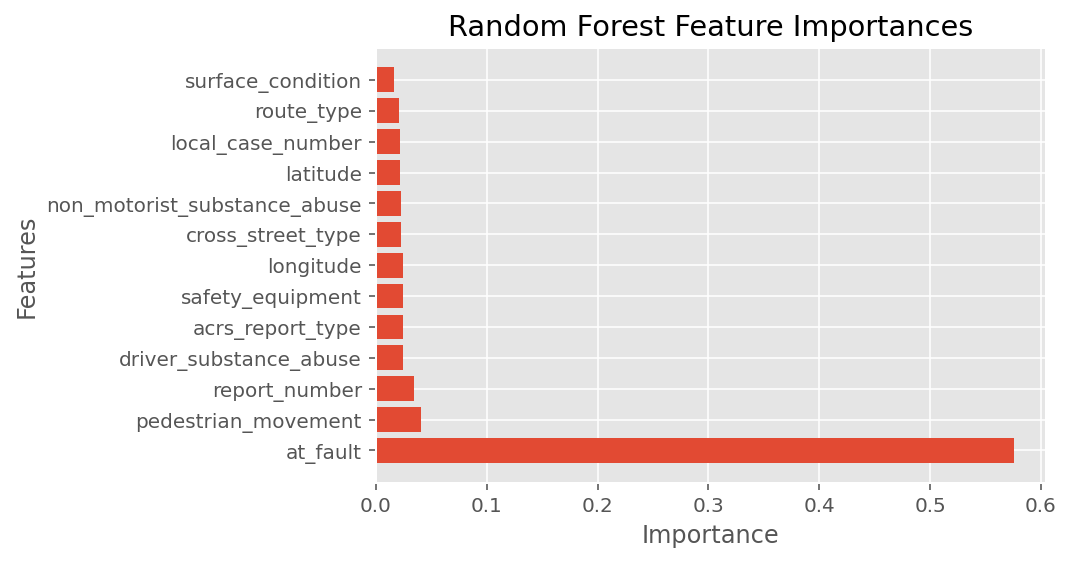

In [263]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest')

# DATA STORIES

Data stories explore and explain how and why data changes over time, usually through a series of linked visualizations. 
The dataset used is Crash Reporting Data set. It includes three datasets. Those datasets are about car crashes that have occurred in the Montgomery County, they provide information about the driver, the incident, and the non-motorist. They are from https://www.montgomerycountymd.gov/. The dataMontgomery program seeks to provide residents and constituents with direct access to County datasets in consumable formats, so they may be viewed, sorted and used in various ways, including being potentially leveraged in the development of new applications and services by interested parties. Providing this information offers the public an opportunity to review and analyze raw data, and the opportunity to use it for a variety of purposes. The data within these datasets are structured, handled in a professional and secure manner, and can be trusted because it is owned by the county. They are weekly updated.  As today the incidents dataset  has **66 494 records and 44 attributs**. Each row has at least one missing value (NaN). A list of all the summations of each column (incidentsData.isnull().sum()) shows 12 attributs (out of 44) without missing values. The drivers dataset has **118036 records and 43 attributs**. Only 17 out of 43 attributs have no missing values. The Non Motorists dataset has few records with  **3839 records and 32 attributs**. 12 out of 32 have no missing values. Removing the rows for each null value will greatly size down the datasets resulting in a skewed model. I decided to keep all three datasets and concatenate them for their visualizatons. By bricking down the crash_date_time into variables Day, Month, Year, Hour and Dayofweek , I was able to show through visualizations,  the most dangerous times to be driving. Most accidents tend to occur between 3 pm and 6 pm. 
With other visualizations, the dataset shows the following discoveries: 
* Number of accidents per year<br>
* Number of fatalities per year<br>
* How roadway surface (type) impact crash<br>
* Non motorists (type) involvement in crash<br>
* Type of vehicle involved in crash<br>
There is lack of precision in the number of fatalities, the variable 'acrs_report_type' has value fatal crash without reporting how many. By lack of information about the driver age and gender, I was unable to investigate the following
* The age group that has the highest number of crashes (or fatalities)<br>
* Gender ratio in the crashes<br> 
The difficulties of joining the three datasets without losing substantial information and shirking the data size, I decided that the modeling being done in each dataset. The Multi-class Classification by Decision Tree on the incidents’ dataset and Multi class Classification using Random Forest on Non Motorists dataset.